In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('airbnb.csv', sep=';')

df['evaluators'] = pd.to_numeric(df['evaluators'], errors='coerce')
df = df.dropna(subset=['evaluators'])
df['evaluators'] = df['evaluators'].astype(int)

In [87]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
df['rating'] = df['rating'].astype(float)

In [97]:
df['price'] = df['price'].str.replace('R$', '', regex=False)

In [102]:
df['price'] = df['price'].astype(float)

array([[<AxesSubplot: title={'center': 'rating'}>,
        <AxesSubplot: title={'center': 'evaluators'}>],
       [<AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >]],
      dtype=object)

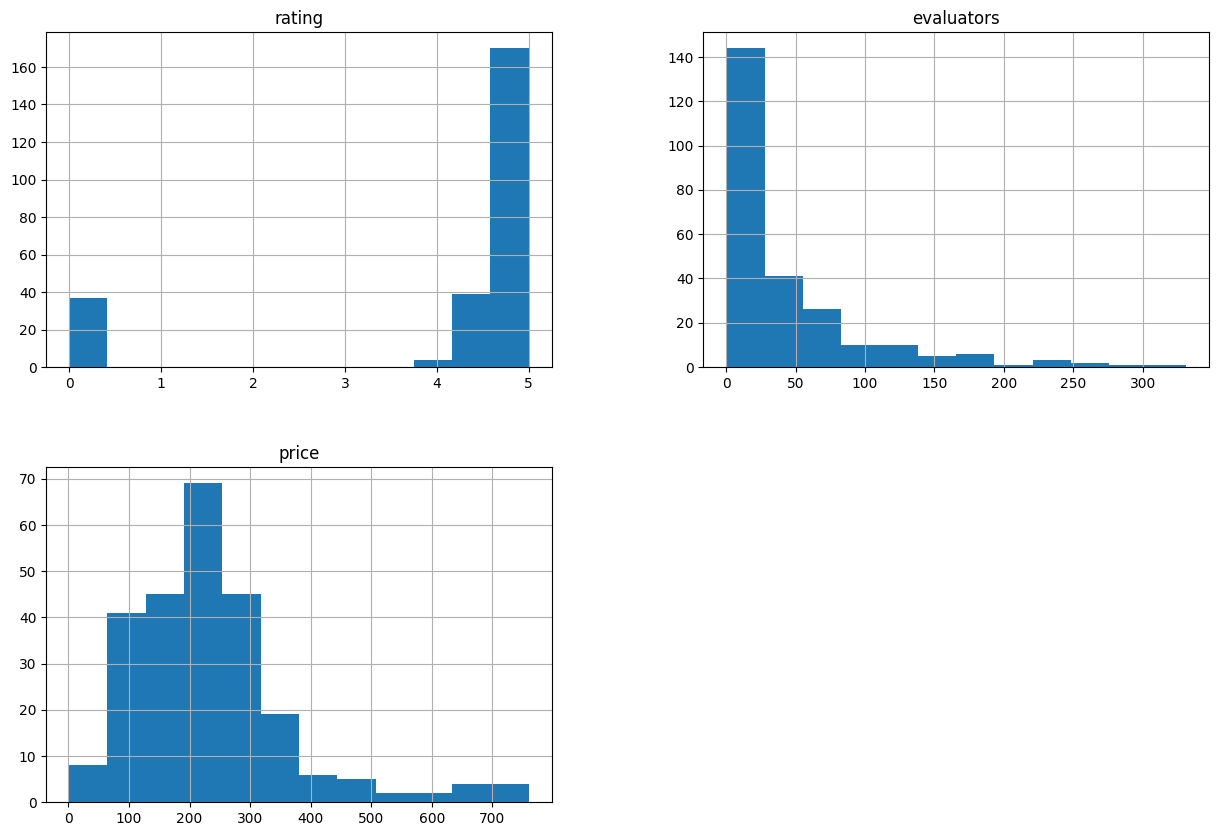

In [103]:
df.hist(bins=12, figsize=(15,10))

In [104]:
df.price.mean()

236.737

In [106]:
#Vamos criar um ponto de corte para os precos
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
IQR_price = q3_price - q1_price
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print(f'''Variável price=> Q1={q1_price},
      Q3={q3_price}, 
      IQR={IQR_price}, 
      Limite superior={sup_price}, 
      Limite inferior={inf_price}''')

Variável price=> Q1=148.0,
      Q3=284.75, 
      IQR=136.75, 
      Limite superior=489.875, 
      Limite inferior=-57.125


price: valores acima de 489.875 e valores = 0:
16 entradas
6.4%


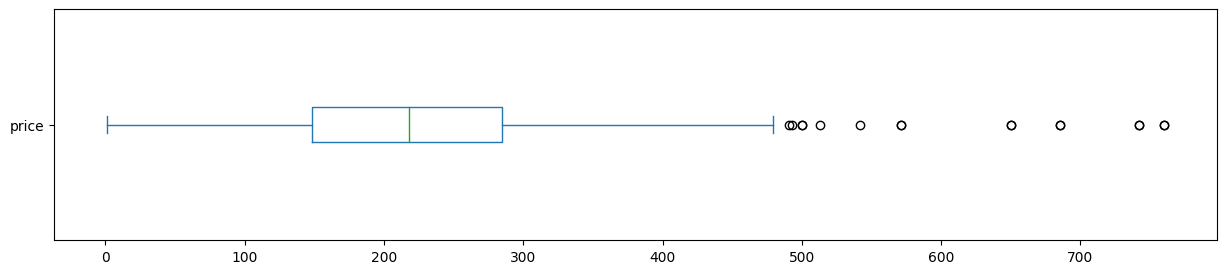

In [107]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_price para price
print(f"price: valores acima de {sup_price} e valores = 0:")
print(f"{len(df[df.price > sup_price])+len(df[df.price == 0])} entradas")
print(f"{(len(df[df.price > sup_price])+len(df[df.price == 0])) / df.shape[0]*100:.4}%")

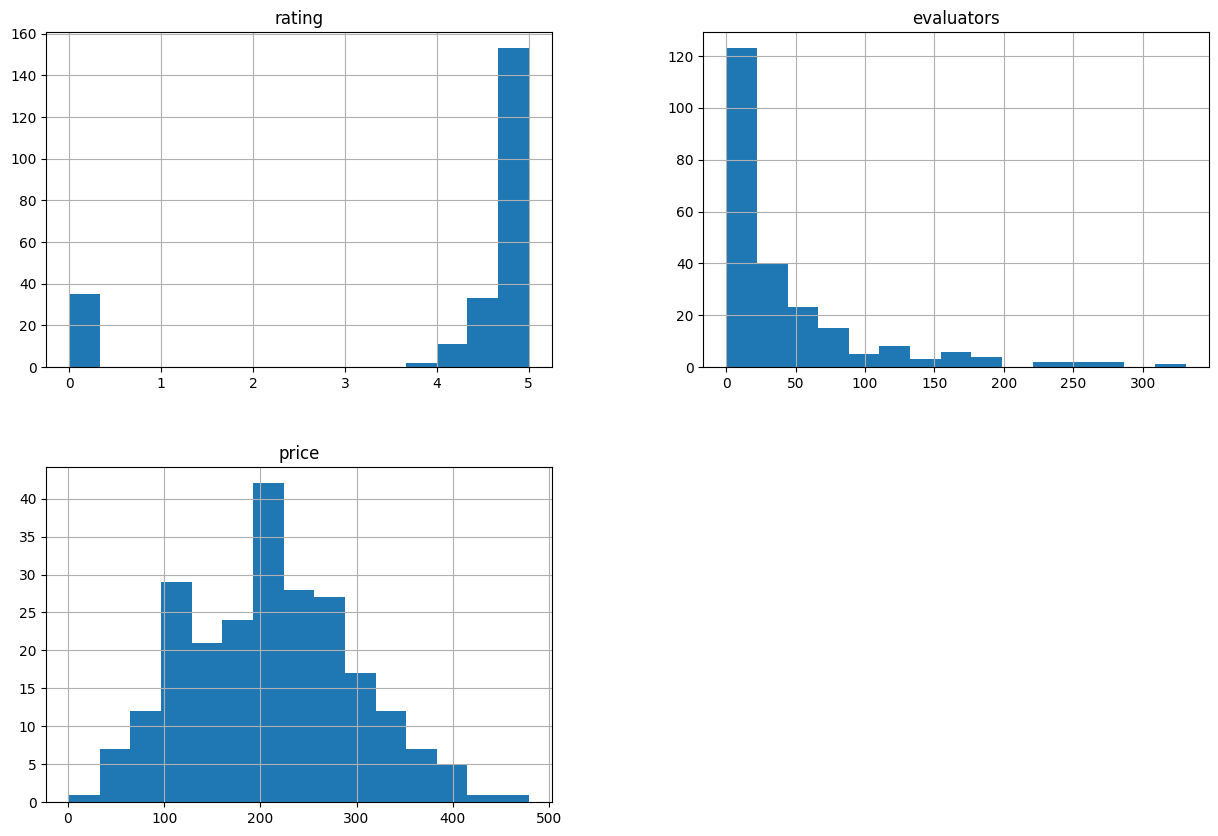

In [108]:
#Eliminando linhas com outlayers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index,
              axis=0,
              inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index,
              axis=0,
              inplace=True)

# Histograma após limpeza dos dados
df_clean.hist(bins=15, figsize=(15,10));

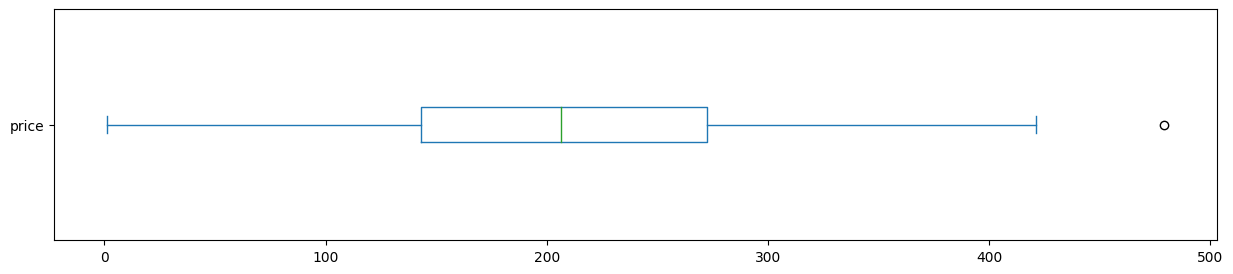

In [109]:
#Boxplot price após retirar outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))

In [110]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.typeAcomodation.value_counts()

Apartamento             154
Quarto inteiro           52
Outro                    26
Quarto compartilhado      2
Name: typeAcomodation, dtype: int64

Apartamento             65.811966
Quarto inteiro          22.222222
Outro                   11.111111
Quarto compartilhado     0.854701
Name: typeAcomodation, dtype: float64


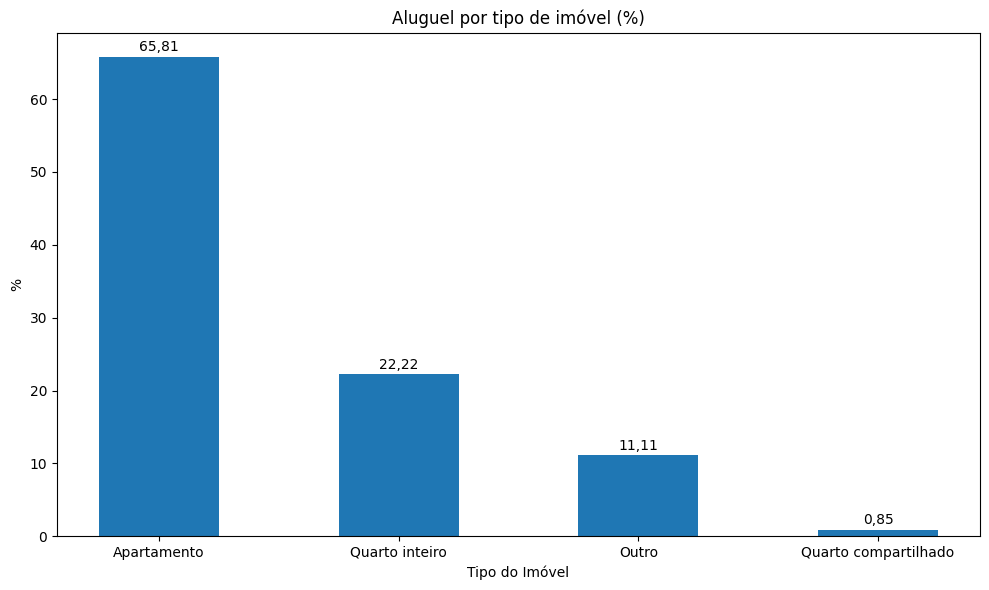

In [114]:
tipo_acomodacao = (df_clean.typeAcomodation.value_counts()/df_clean.shape[0]*100).sort_values(ascending=False)

print(tipo_acomodacao)

df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()

df_acomodacao.columns=['Tipo_Acomodacao','Porcentagem']

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(df_acomodacao['Tipo_Acomodacao'],
                         df_acomodacao['Porcentagem'],0.5, label = 'Porcentagem')

ax.set_title("Aluguel por tipo de imóvel (%)")
ax.set_xlabel("Tipo do Imóvel")
ax.set_ylabel("%")

larg = barras[0].get_width()

for barra in barras:
  rotulo = f"{barra.get_height():_.2f}"
  rotulo = rotulo.replace('.', ',')
  rotulo = rotulo.replace('_', '.')
  posx = barra.get_x()
  posy = barra.get_height()
  ax.annotate(rotulo, xy=(posx+larg/2, posy), ha='center', xytext=(0,4), textcoords=('offset points'))

plt.tight_layout()

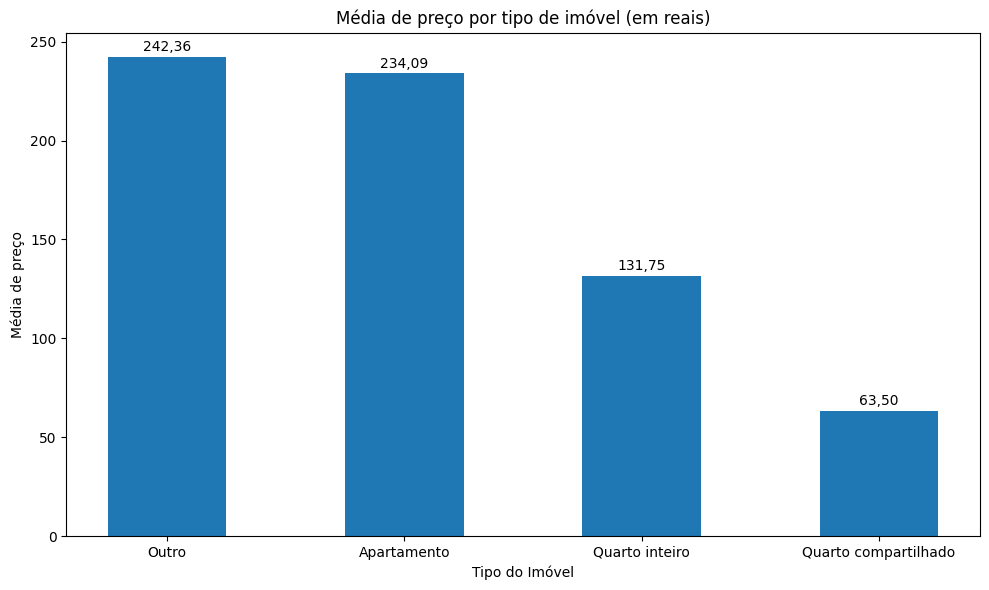

In [119]:
tipo_acomodacao = (df_clean.groupby('typeAcomodation').price.mean().
                   sort_values(ascending=False))
df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()
df_acomodacao.columns=['typeAcomodation','Mean']

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(df_acomodacao['typeAcomodation'],df_acomodacao['Mean'],0.5, 
                         label = 'Média')


ax.set_title("Média de preço por tipo de imóvel (em reais)")
ax.set_xlabel("Tipo do Imóvel")
ax.set_ylabel("Média de preço")

larg = barras[0].get_width()

for barra in barras:
  rotulo = f"{barra.get_height():_.2f}"
  rotulo = rotulo.replace('.', ',')
  rotulo = rotulo.replace('_', '.')
  posx = barra.get_x()
  posy = barra.get_height()
  ax.annotate(rotulo, xy=(posx+larg/2, posy), ha='center', xytext=(0,4), textcoords=('offset points'))

plt.tight_layout()

In [116]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
bairros_media  =  df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
bairros_minimo =  df_clean.groupby('neighbourhood').price.min().sort_values(ascending=False)
bairros_maximo =  df_clean.groupby('neighbourhood').price.max().sort_values(ascending=False)
bairros_qt     =  df_clean['neighbourhood'].value_counts() 


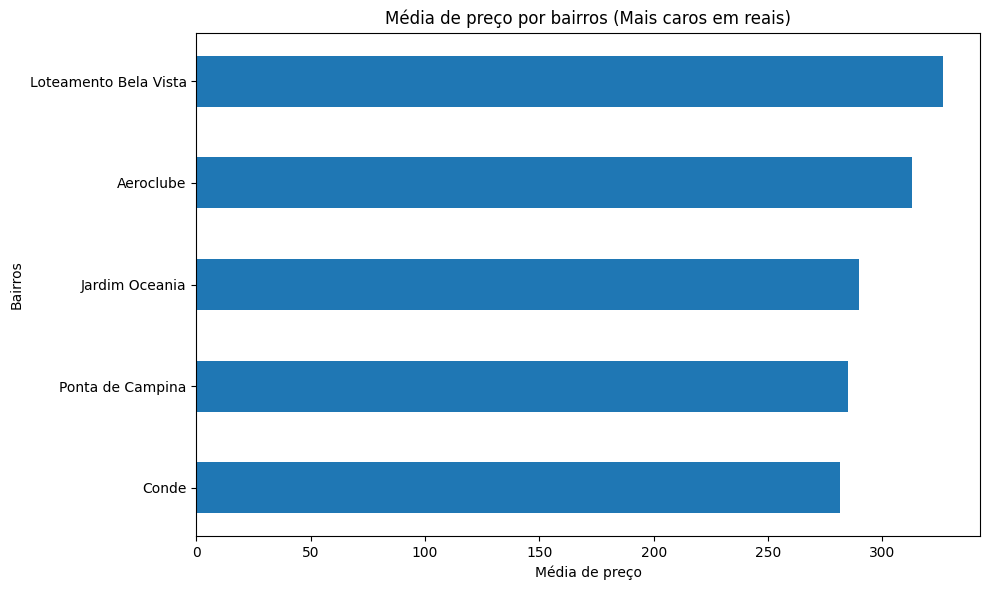

In [140]:
bairro = (df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False))
bairro = bairro.head().sort_values()
df_acomodacao = pd.DataFrame([bairro.keys(),bairro.values]).transpose()
df_acomodacao.columns=['Bairro','Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.barh(df_acomodacao['Bairro'],df_acomodacao['Mean'],0.5)

larg = tipo_acomodacao[0].get_height()

ax.set_title("Média de preço por bairros (Mais caros em reais)")
ax.set_xlabel("Média de preço")
ax.set_ylabel("Bairros")

plt.tight_layout()

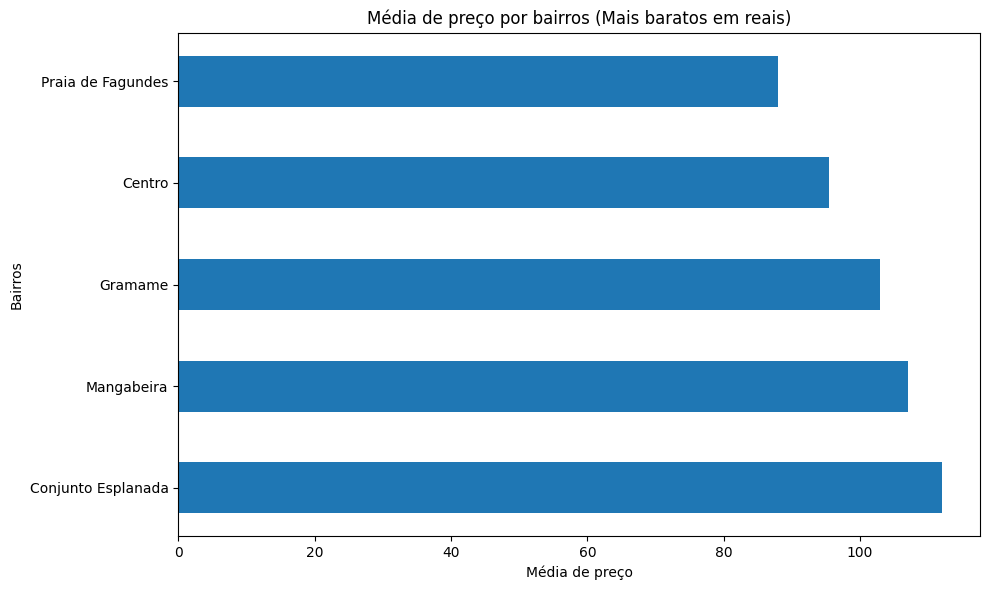

In [121]:
bairro = (df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False))
bairro = bairro.tail().sort_values(ascending=False)
df_acomodacao = pd.DataFrame([bairro.keys(),bairro.values]).transpose()
df_acomodacao.columns=['Bairro','Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.barh(df_acomodacao['Bairro'], df_acomodacao['Mean'],0.5)

ax.set_title("Média de preço por bairros (Mais baratos em reais)")
ax.set_xlabel("Média de preço")
ax.set_ylabel("Bairros")

plt.tight_layout()

neighbourhood
Mangabeira               5.000000
Loteamento Bela Vista    4.986667
Altiplano Cabo Branco    4.910000
Aeroclube                4.900000
Praia de Fagundes        4.900000
Name: rating, dtype: float64


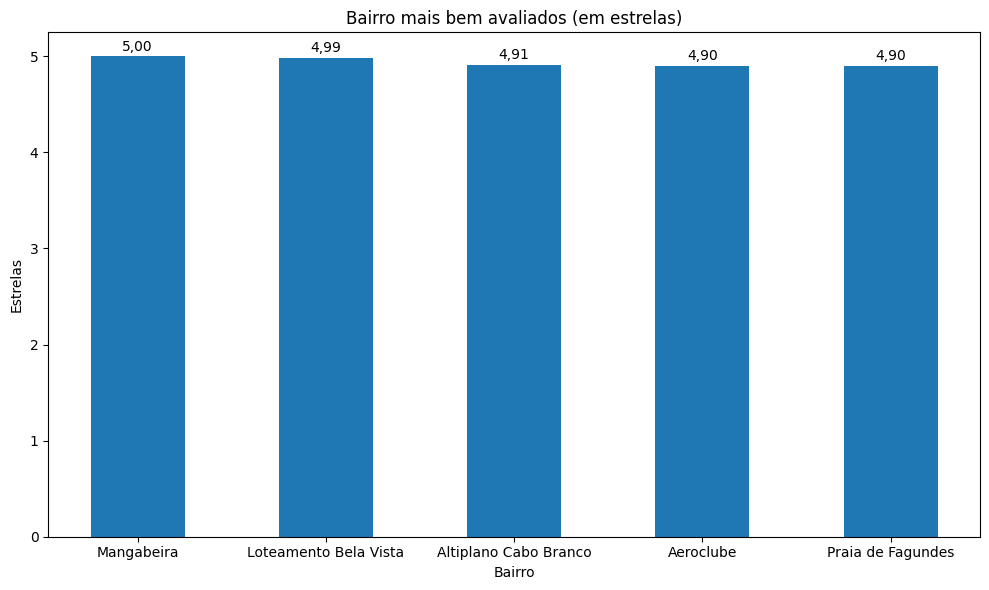

In [151]:
neighbourhood = (df_clean.groupby('neighbourhood').rating.mean().sort_values(ascending=False)).head()
print(neighbourhood)

df_acomodacao = pd.DataFrame([neighbourhood.keys(),neighbourhood.values]).transpose()

df_acomodacao.columns=['Bairro','Estrelas']

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(df_acomodacao['Bairro'],
                         df_acomodacao['Estrelas'], 0.5, label = 'Estrelas')

ax.set_title("Bairro mais bem avaliados (em estrelas)")
ax.set_xlabel("Bairro")
ax.set_ylabel("Estrelas")

larg = barras[0].get_width()

for barra in barras:
  rotulo = f"{barra.get_height():_.2f}"
  rotulo = rotulo.replace('.', ',')
  rotulo = rotulo.replace('_', '.')
  posx = barra.get_x()
  posy = barra.get_height()
  ax.annotate(rotulo, xy=(posx+larg/2, posy), ha='center', xytext=(0,4), textcoords=('offset points'))

plt.tight_layout()

neighbourhood
Centro        2.250000
Bancários     2.500000
Conde         3.186667
Intermares    3.838333
Name: rating, dtype: float64


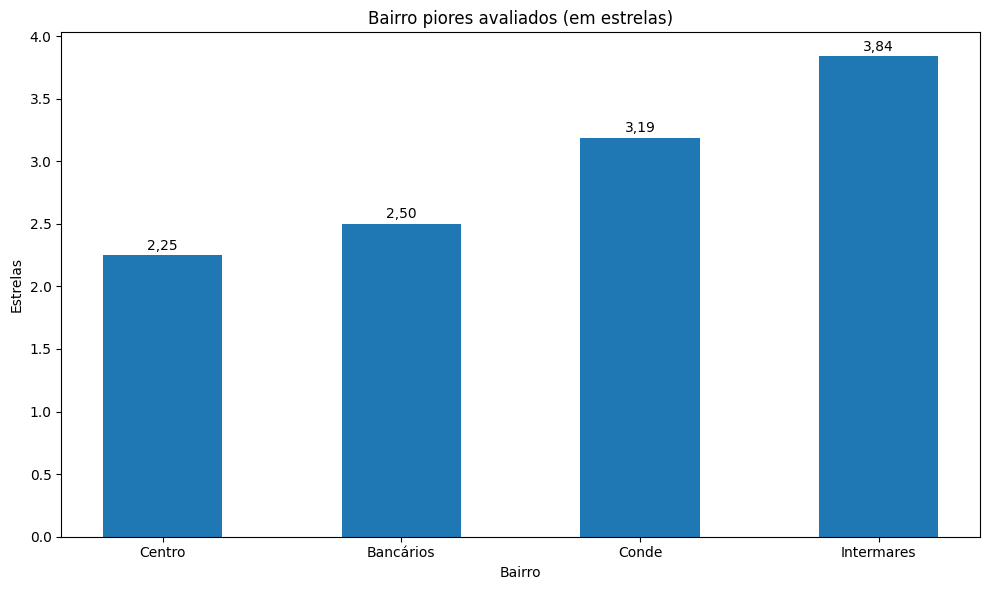

In [162]:
neighbourhood = (df_clean.groupby('neighbourhood').rating.mean().sort_values(ascending=True)).head()
neighbourhood.drop(index='João Pessoa', inplace=True)
print(neighbourhood)

df_acomodacao = pd.DataFrame([neighbourhood.keys(),neighbourhood.values]).transpose()

df_acomodacao.columns=['Bairro','Estrelas']

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(df_acomodacao['Bairro'],
                         df_acomodacao['Estrelas'], 0.5, label = 'Estrelas')

ax.set_title("Bairro piores avaliados (em estrelas)")
ax.set_xlabel("Bairro")
ax.set_ylabel("Estrelas")

larg = barras[0].get_width()

for barra in barras:
  rotulo = f"{barra.get_height():_.2f}"
  rotulo = rotulo.replace('.', ',')
  rotulo = rotulo.replace('_', '.')
  posx = barra.get_x()
  posy = barra.get_height()
  ax.annotate(rotulo, xy=(posx+larg/2, posy), ha='center', xytext=(0,4), textcoords=('offset points'))

plt.tight_layout()